This notebook was made to explore the project and will have some preliminary results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

$N^2 = -\frac{g}{\rho_{0}(z)}\frac{\partial \rho_{0}(z)}{\partial z}$

Assume $\rho_{0}$ = 1e3, $\frac{\partial \rho_{0}(z)}{\partial z}$ = 1e-1

Literature review of conditions for baroclinic tides:
$\frac{\sigma^2 - f^2}{N^2-\sigma^2}$~$\frac{dH}{dX}$

In [2]:
## define some constants
g = 10
ngrid =40
b0 = 400
L = 20e3
dx = L/(ngrid-1)
dz = b0/(ngrid-1)
omega =2*np.pi/(12.25*3600) ##frequency of the initial M2 barotropic tidal currents
k = - omega/np.sqrt(g*b0)## wavenumber in x dimension
N2 = 1e-3

In [3]:
## define psi, psi_t, psi_c, H, x and z grid points
psi = np.zeros((ngrid,ngrid))
psi_t = np.zeros((ngrid,ngrid))
psi_c = np.zeros((ngrid,ngrid))
H = b0*np.ones((ngrid,ngrid))
x = np.arange(ngrid)
z= np.flipud(x)
x,z = np.meshgrid(x,z)

In [22]:
def bathy1(b0, ngrid):
    ## construct slope topography
    topo = np.loadtxt("depth.txt")
    for i in np.arange(ngrid):
        H[i,:] =topo[i]
    m = np.zeros_like(H)
    for j in np.arange(ngrid/2):
        i = j+20
        m[i:, j] = 1
    ## mask the slope bathymetry
    Hm = np.ma.masked_array(H, m)
    #Hm[(ngrid-1)/2,0] = Hm[(ngrid-1)/2,1]
    #Hm[0,(ngrid-1)/2] = Hm[0,(ngrid-1)/2+1]
    Hm = np.flipud(Hm)

    return Hm

In [ ]:
def bathy2(b0, ngrid):
    ## construct step topography
    topo = np.loadtxt("depth.txt")
    for i in np.arange(ngrid):
        H[i,:] =topo[i]
    m = np.zeros_like(H)
    for j in np.arange(ngrid/2):
        i = j+20
        m[i:, j] = 1
    ## mask the step bathymetry
    Hm = np.ma.masked_array(H, m)
    #Hm[(ngrid-1)/2,0] = Hm[(ngrid-1)/2,1]
    #Hm[0,(ngrid-1)/2] = Hm[0,(ngrid-1)/2+1]
    Hm = np.flipud(Hm)

    return Hm

In [23]:
Hm = bathy1(b0,ngrid)

40

In [6]:
## define slope of the topography
#x_slope = np.arange(ngrid/2)
#z_slope = np.flipud(np.arange(ngrid/2))
## define x,y_slope corner of the topography
#x_slope_corner = np.delete(x_slope, -1)
#z_slope_corner = z_slope+1
#z_slope_corner = np.delete(z_slope_corner, -1)
##append the corner points and slope points
#x_x = np.append(x_slope,x_slope_corner)
#z_z = np.append(z_slope,z_slope_corner)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


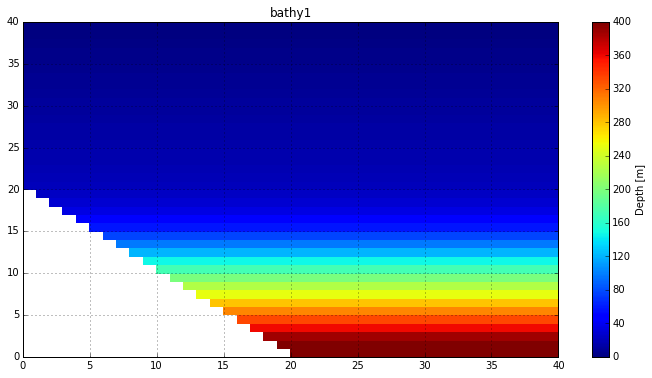

In [26]:
fig, ax =plt.subplots(1,1,figsize = (12,6))
plot=ax.pcolormesh(Hm,linewidth=0,rasterized=True, vmin = 0, vmax= 400)
cbar= plt.colorbar(plot)
cbar.set_label('Depth [m]')
ax.grid('on')
ax.set_xlim(0,40)
ax.set_ylim(0,40)
ax.set_title('bathy1')

In [10]:
def initial_conditions(psi):
    """Set the initial condition values when t=0.
    """
    for j in np.arange(ngrid):
        #psi = np.empty(n_grid)
        psi[-1,j] = (omega/k)*np.sin(k*x*np.pi/180)*((b0+j)/b0)

In [11]:
def boundary_conditions(psi, ngrid):
    """Set the boundary condition values.
    """
    ## three fixed boundary
    psi[0,:] = 0
    psi[-1,(ngrid-1)/2:] = 0
    psi[(ngrid-1)/2-1:,0] = 0
    ## one baroclinic solution by leap-frog to fix the boundary
    psi[(ngrid-1)/2 - 2, 1] = psi_c[(ngrid-1)/2 - 2, 1] ## no need to shift?

In [12]:
def leap_frog(x_x,z_z,psi):
    """Calculate the next x (or i) values using the leap-frog scheme.
    """
    ## This loop is for upper water with no steep topography
    for i in np.arange(1,ngrid):
        for pz in np.arange((ngrid-1)/2, ngrid,1):
            psi_c[i+1, pz] = 2*psi_c[i, pz] + (dx**2/N2)*(omega**2(psi_c[i,pz+1]-2*psi_c[i,pz]\
            +psi_c[i,pz-1])/dz**2-(N2/g)*omega**2*(psi_c[i,pz+1]-psi_c[i,pz-1])/(2*dz))
    ## With steep topography
    
    return psi   